Lista8

Zad1


In [2]:

import pandas as pd

data = pd.read_csv("UCI_Credit_Card.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [3]:
print(data.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

Zad2

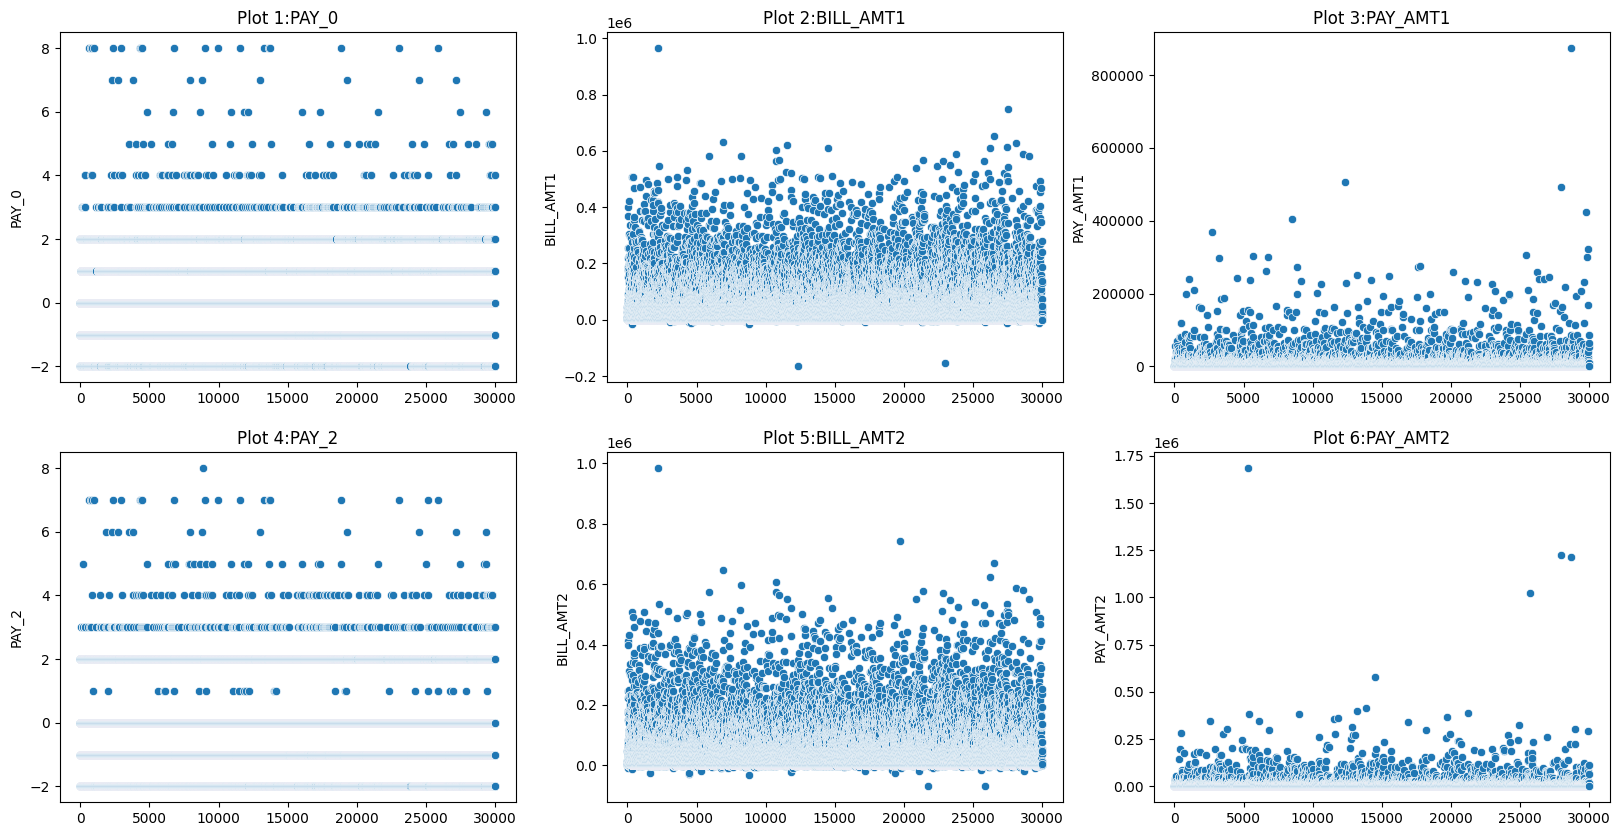

In [4]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


#"paymant/bank" cos
full_cols = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

cols = [ "PAY_0", "BILL_AMT1", "PAY_AMT1", "PAY_2", "BILL_AMT2", "PAY_AMT2"]



fig, axs = plt.subplots(ncols=3, nrows=2 ,figsize=(20,10))
axs = axs.flatten()

for i, column in enumerate(cols):
    X = data[column]
    sns.scatterplot(data=X, ax=axs[i]).set(title=f"Plot {i+1}:{column}")

plt.show()

<Axes: xlabel='BILL_AMT1', ylabel='PAY_0'>

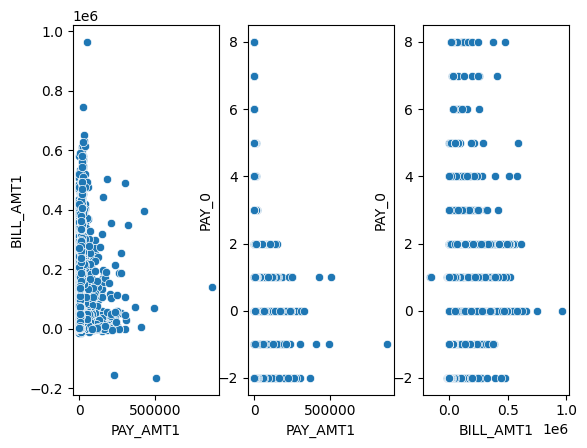

In [5]:
k_cols = ["PAY_AMT1","BILL_AMT1", "PAY_0"]
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=data, x="PAY_AMT1", y="BILL_AMT1", ax=axs[0])
sns.scatterplot(data=data, x="PAY_AMT1", y="PAY_0", ax=axs[1])
sns.scatterplot(data=data, x="BILL_AMT1", y="PAY_0", ax=axs[2])



<Axes: ylabel='LIMIT_BAL'>

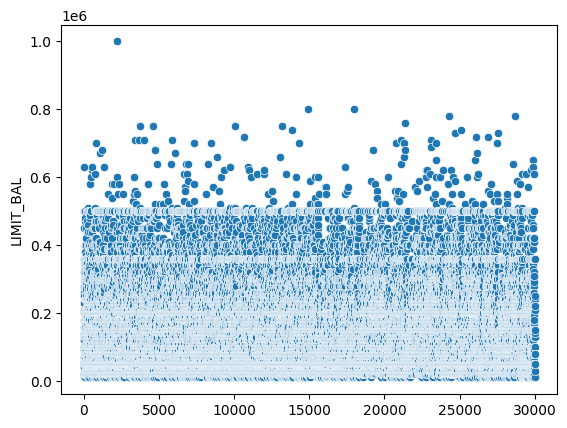

In [6]:
sns.scatterplot(data=data["LIMIT_BAL"])

<Axes: xlabel='BILL_AMT1', ylabel='PAY_AMT1'>

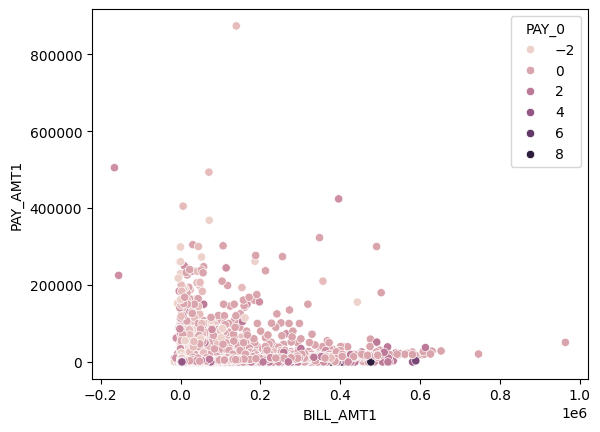

In [7]:
k_cols = ["PAY_AMT1","BILL_AMT1", "PAY_0"]

X = data[k_cols]

sns.scatterplot(data=X, x='BILL_AMT1',y="PAY_AMT1", hue="PAY_0")

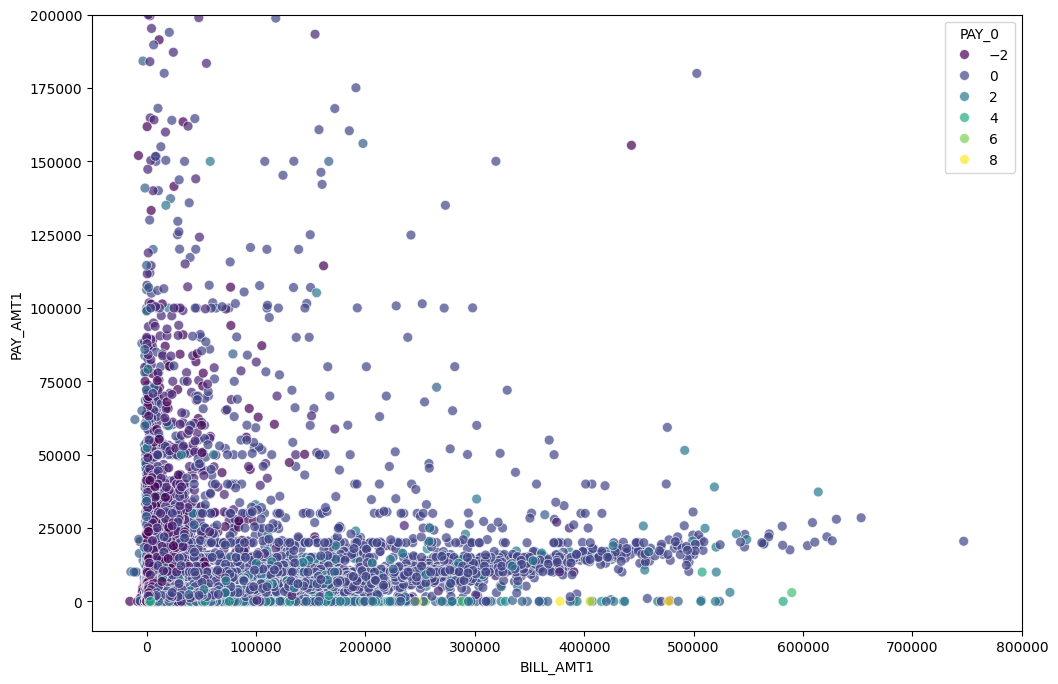

In [8]:
#zoomed 
plt.figure(figsize=(12,8))
sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', hue='PAY_0', data=data, alpha=0.7,s=50 ,palette='viridis')
plt.xlim(-50000, 800000)
plt.ylim(-10000, 200000)
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

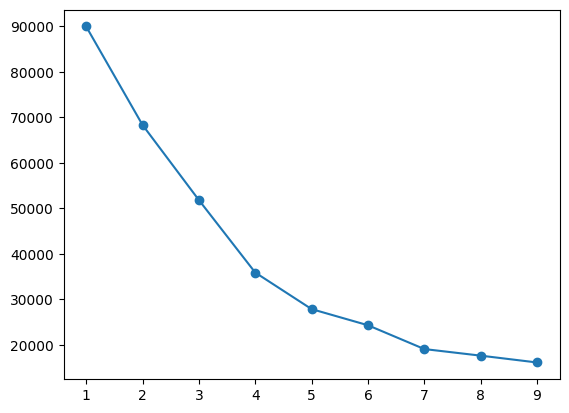

In [10]:
inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker='o')

plt.show()

<Axes: xlabel='BILL_AMT1', ylabel='PAY_AMT1'>

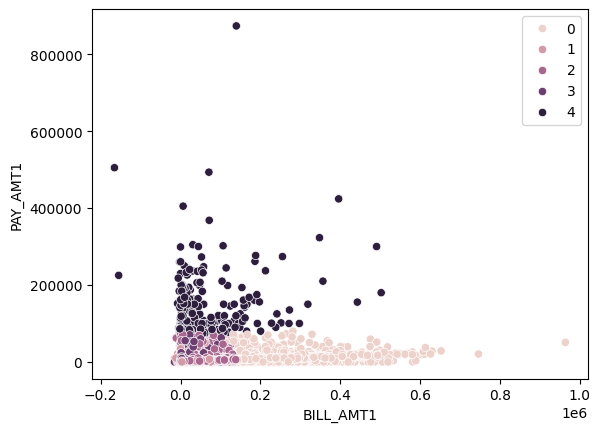

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto").fit(X_scaled)
kmeans.labels_
sns.scatterplot(data = X, x = 'BILL_AMT1', y = 'PAY_AMT1', hue = kmeans.labels_)

<Axes: >

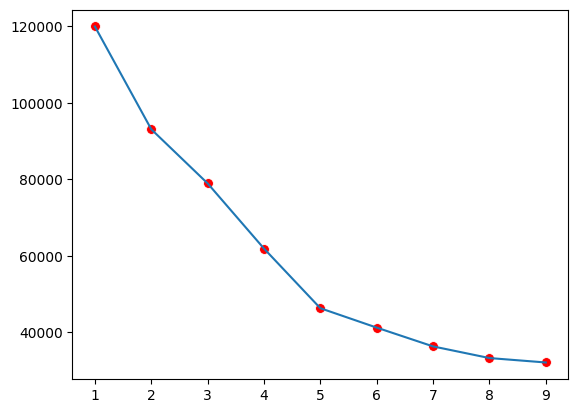

In [12]:
k_cols = ["PAY_AMT1","BILL_AMT1", "PAY_0", "LIMIT_BAL"]

X = data[k_cols]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

interia = []

k = range(1,10)

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto").fit(X_scaled)
    interia.append(kmeans.inertia_)

sns.lineplot(x=k, y=interia)
sns.scatterplot(x=k, y=interia, color="red", s=50)



In [13]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto').fit(X_scaled)

[0.36309993 0.29692212]


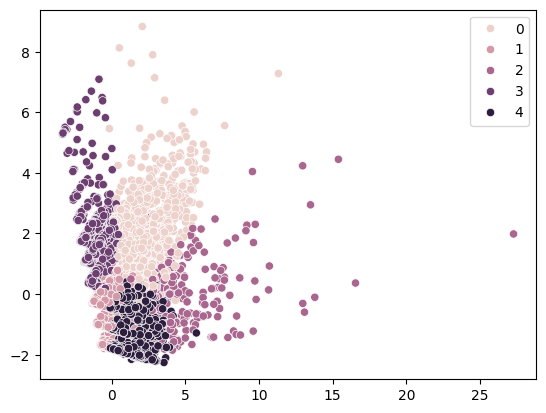

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_)

print(pca.explained_variance_ratio_)


Zad3

In [15]:
k_cols = ["PAY_AMT1","BILL_AMT1", "PAY_0", "LIMIT_BAL"]

X = data[k_cols]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X_scaled)




In [16]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=bandwidth)

ms.fit(X_scaled)

KeyboardInterrupt: 

<Axes: >

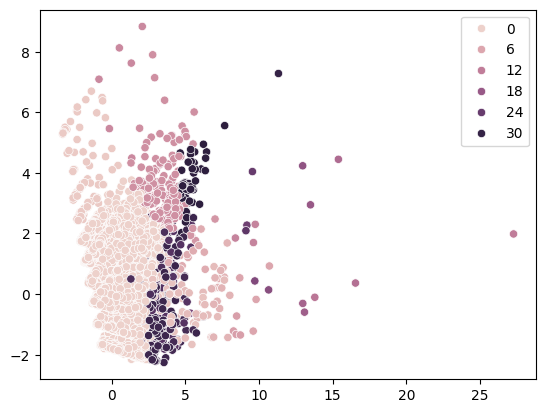

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=ms.labels_)

Text(0.5, 1.0, 'KMEANS')

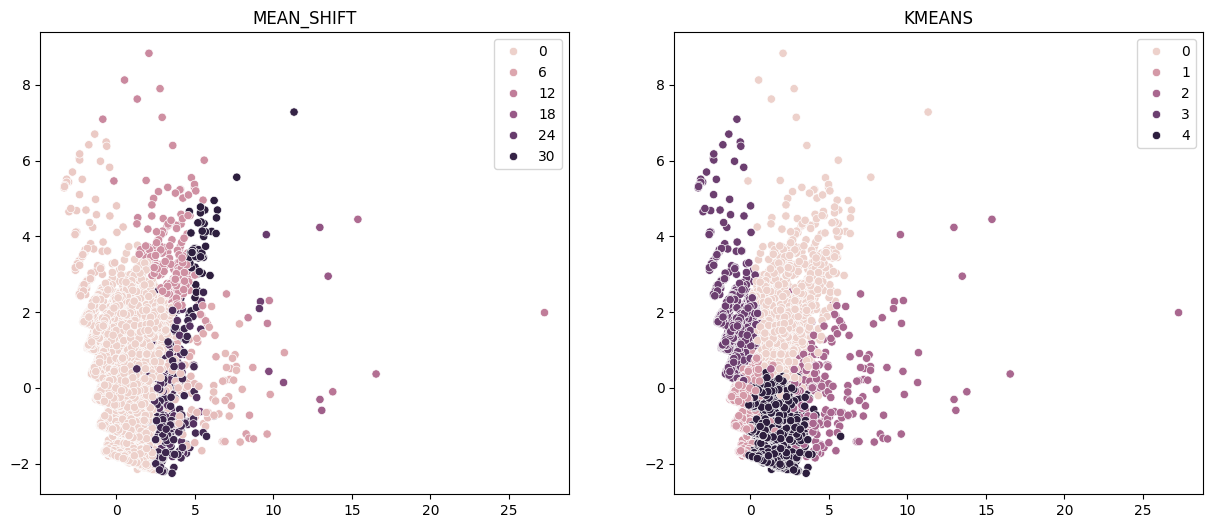

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=ms.labels_, ax=axs[0]).set_title("MEAN_SHIFT")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_).set_title("KMEANS")


ZAD4

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

print(data.DESCR)

X = data.data

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

[0.72962445 0.22850762]


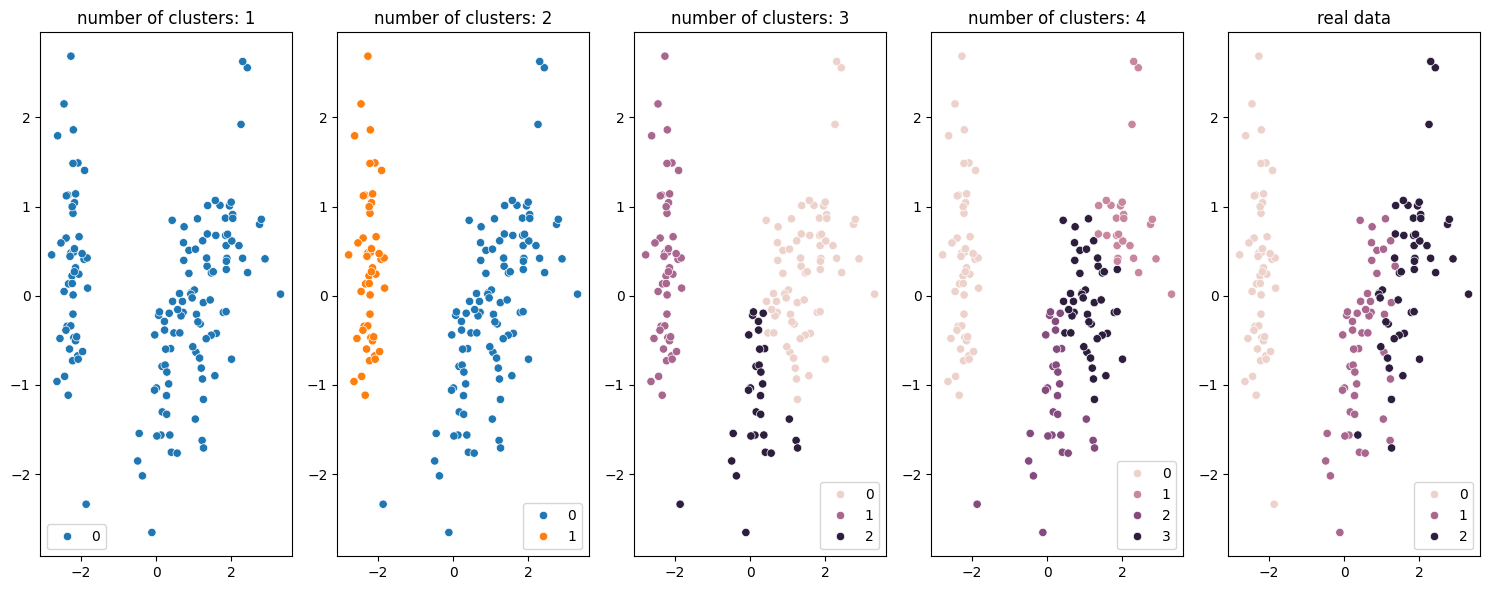

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)

from sklearn.cluster import AgglomerativeClustering


fig, axs = plt.subplots(ncols=5, figsize=(15,6))

for number in range(1,5):
    cluster = AgglomerativeClustering(n_clusters=number)
    cluster.fit(X_scaled)
    labels = cluster.labels_
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, ax=axs[number-1]).set_title(f"number of clusters: {number}")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data.target).set_title("real data")

plt.tight_layout()
plt.show()

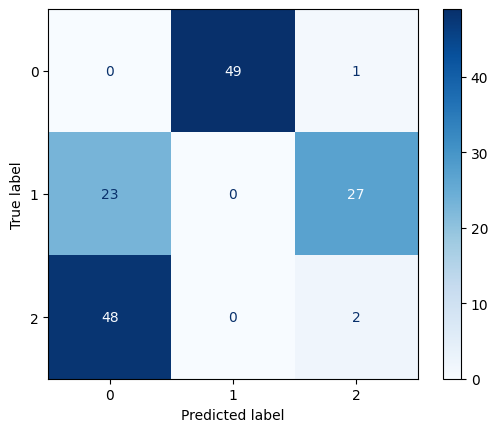

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit(X_scaled)
labels = cluster.labels_

cm = confusion_matrix(data.target, labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

Zad5

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
print(data.DESCR)
X = data.data

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

[0.36198848 0.1920749 ]


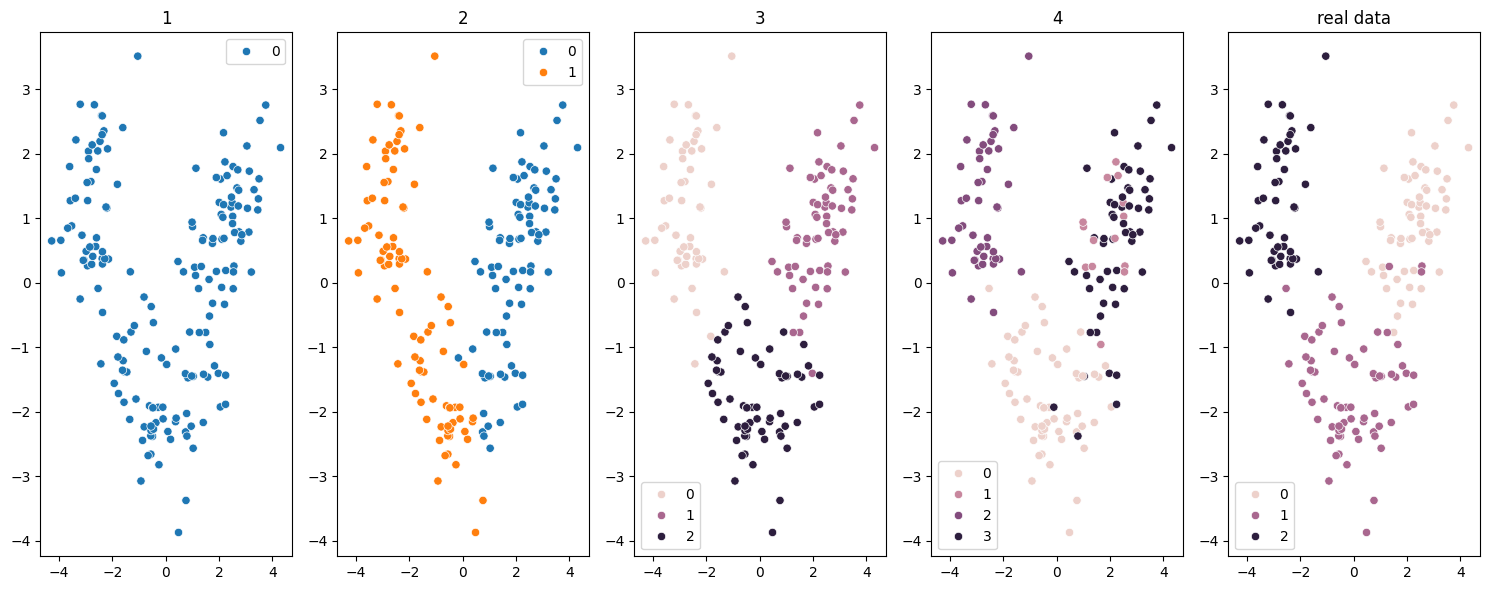

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)

from sklearn.mixture import GaussianMixture

fig, axs = plt.subplots(ncols=5, figsize=(15,6))
for number in range(1,5):
    gmm = GaussianMixture(n_components=number)
    gmm.fit(X_scaled)

    labels = gmm.predict(X_scaled)

    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, ax=axs[number -1]).set_title(number)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data.target).set_title("real data")

plt.tight_layout()
plt.show()




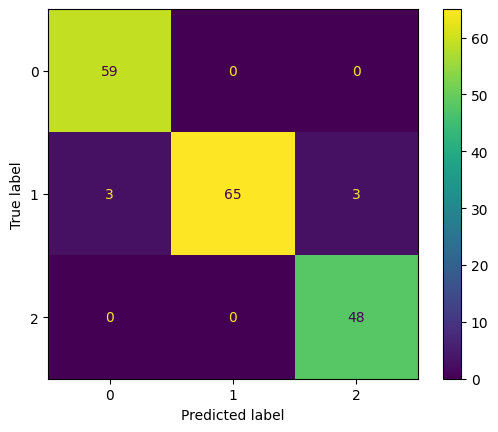

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(data.target, labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Zad6

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces(shuffle=True, random_state=42)

X = data.data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

<Axes: >

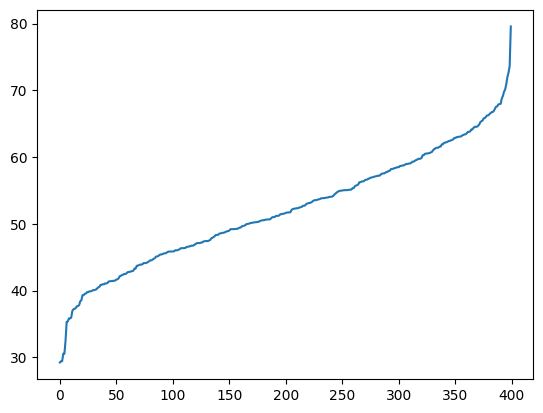

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

min_samples = 5


neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

#Sortowanie odległości do min_samples-tego sąsiada
distances = np.sort(distances[:, -1])


sns.lineplot(distances)


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=40 ,min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

<Axes: >

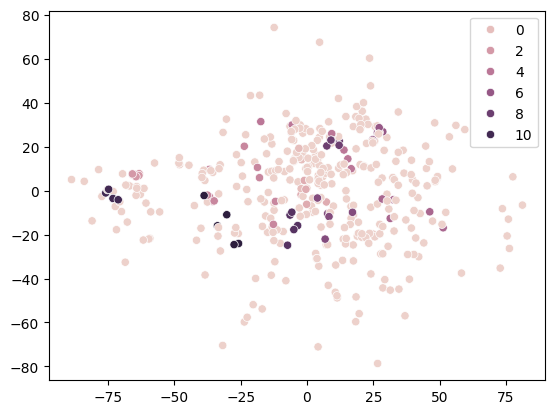

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters)

Zad7

In [ ]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

X = data.data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

<Axes: >

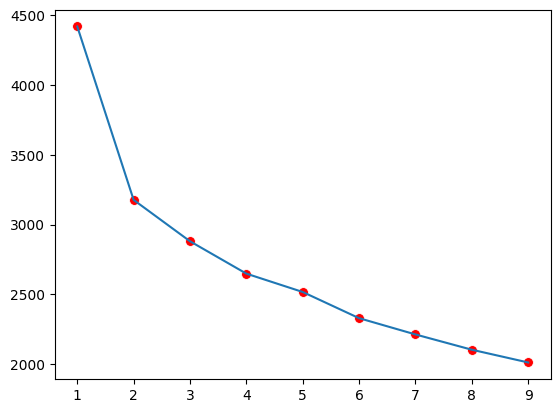

In [ ]:
from sklearn.cluster import KMeans

inertia = []
cluster_range = range(1, 10)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

sns.lineplot(x=list(cluster_range), y=inertia)
sns.scatterplot(x=list(cluster_range), y=inertia, color="red", s=50)

[0.40242108 0.14923197]


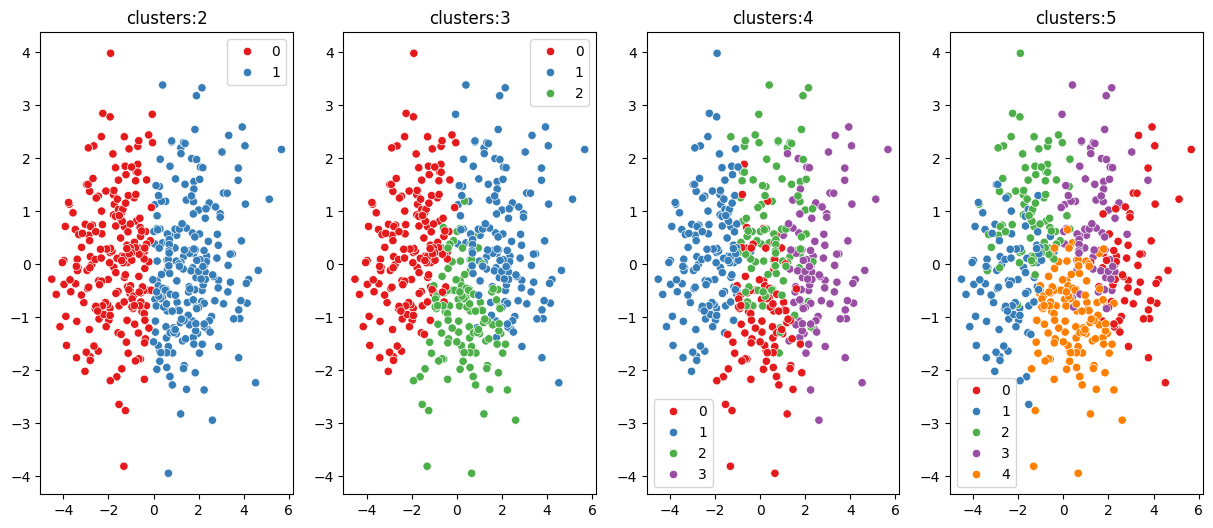

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)


fig, axs = plt.subplots(ncols = 4, figsize=(15,6))
for i in range(2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, ax=axs[i-2], palette="Set1").set_title(f"clusters:{i}")
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
labels = kmeans.labels_


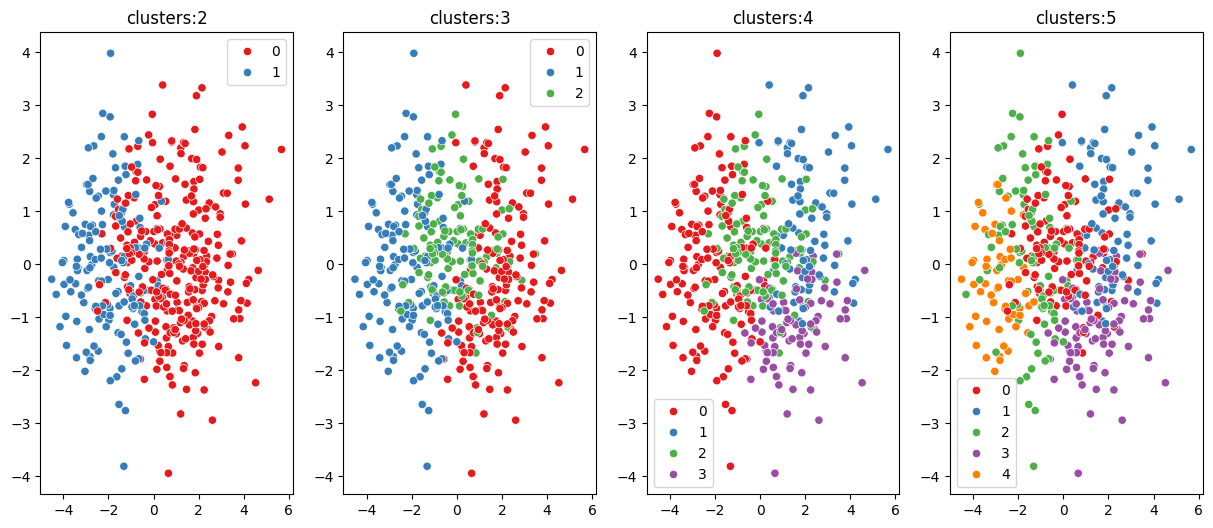

In [ ]:
from sklearn.cluster import AgglomerativeClustering


fig, axs = plt.subplots(ncols = 4, figsize=(15,6))
for i in range(2,6):
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(X_scaled)
    
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agg.labels_, ax=axs[i-2], palette="Set1").set_title(f"clusters:{i}")

Zad8

In [ ]:
import pandas as pd

data = pd.read_csv("heart.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [ ]:
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()

label_mappings = {}

for col in data_encoded.columns:
    if data_encoded[col].dtype =='object':
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col])
        label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
print(data_encoded.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = StandardScaler().fit_transform(data_encoded.drop(columns=['HeartDisease']))




In [ ]:
def evaluate_clustering(labels, X):
    return {
        'Silhouette Score': silhouette_score(X, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(X, labels),
        'Davies-Bouldin Score': davies_bouldin_score(X, labels)
    }

In [ ]:
results = {}

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
results['KMeans'] = evaluate_clustering(kmeans.labels_, X)

meanshift = MeanShift().fit(X)
results['MeanShift'] = evaluate_clustering(meanshift.labels_, X)

gmm = GaussianMixture(n_components=3, random_state=0).fit(X)
gmm_labels = gmm.predict(X)
results['GMM'] = evaluate_clustering(gmm_labels, X)


dbscan = DBSCAN(eps=1.5, min_samples=5).fit(X)

if len(set(dbscan.labels_)) > 1:
    results['DBSCAN'] = evaluate_clustering(dbscan.labels_, X)
else:
    results['DBSCAN'] = {
        'Silhouette Score': None,
        'Calinski-Harabasz Score': None,
        'Davies-Bouldin Score': None
    }


In [ ]:
pd.DataFrame(results).T

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans,0.145449,144.080778,2.355460
MeanShift,0.446583,5.352259,0.422089
GMM,0.136983,104.010191,2.251694
DBSCAN,-0.118843,14.326891,1.783797
